In [36]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from deep_translator import GoogleTranslator
import pinyin

In [2]:
files = [file for file in os.listdir("Station_data")]

In [3]:
rows = []
for file in files:
    with open("./Station_Data/" + file) as f:
        lines = f.readlines()[1:]
        lines = [line.split(",") for line in lines]
        for line in lines:
            rows.append((file, line[0], line[1].strip("\n")))

In [4]:
ridership = pd.DataFrame(rows, columns=["station_1", "station_2", "trains"])
ridership.head(3)

,station_1,station_2,trains
0,Achengbei Railway Station,Haerbinxi Railway Station,97
1,Achengbei Railway Station,Haerbin Railway Station,112
2,Achengbei Railway Station,Shangzhinan Railway Station,252


In [43]:
ridership["s1_strip"] = ridership["station_1"].str.replace(" Railway Station", "").str.lower()
ridership["s2_strip"] = ridership["station_2"].str.replace(" Railway Station", "").str.lower()
ridership.head(2)

,station_1,station_2,trains,s1_strip,s2_strip
0,Achengbei Railway Station,Haerbinxi Railway Station,97,achengbei,haerbinxi
1,Achengbei Railway Station,Haerbin Railway Station,112,achengbei,haerbin


In [8]:
lines = gpd.read_file("./stations_geo/China_HSR_2016_lines.shp")
stations = gpd.read_file("./stations_geo/China_HSR_2016_stations.shp")

In [34]:
stations["name"] = stations["NAME_ZH"].apply(
    lambda x: GoogleTranslator(source="zh-CN", target="en").translate(x)
)
stations.head(3)

,OBJECTID,NAME_ZH,speed_kph,line_name,KML_FOLDER,geometry,name
0,1,华容,200,武九线/车站,200+ upgraded conventional/武九线/车站,POINT Z (114.73729 30.52040 0.00000),Huarong
1,2,黄石,200,武九线/车站,200+ upgraded conventional/武九线/车站,POINT Z (114.93489 30.15640 0.00000),yellowstone
2,3,阳新,200,武九线/车站,200+ upgraded conventional/武九线/车站,POINT Z (115.17481 29.86132 0.00000),Yangxin


In [37]:
stations["romanized"] = stations["NAME_ZH"].apply(
    lambda x: pinyin.get(x, format="strip")
)
stations.head(3)

,OBJECTID,NAME_ZH,speed_kph,line_name,KML_FOLDER,geometry,name,romanized
0,1,华容,200,武九线/车站,200+ upgraded conventional/武九线/车站,POINT Z (114.73729 30.52040 0.00000),Huarong,huarong
1,2,黄石,200,武九线/车站,200+ upgraded conventional/武九线/车站,POINT Z (114.93489 30.15640 0.00000),yellowstone,huangshi
2,3,阳新,200,武九线/车站,200+ upgraded conventional/武九线/车站,POINT Z (115.17481 29.86132 0.00000),Yangxin,yangxin


In [38]:
stations

,OBJECTID,NAME_ZH,speed_kph,line_name,KML_FOLDER,geometry,name,romanized
0,1,华容,200,武九线/车站,200+ upgraded conventional/武九线/车站,POINT Z (114.73729 30.52040 0.00000),Huarong,huarong
1,2,黄石,200,武九线/车站,200+ upgraded conventional/武九线/车站,POINT Z (114.93489 30.15640 0.00000),yellowstone,huangshi
2,3,阳新,200,武九线/车站,200+ upgraded conventional/武九线/车站,POINT Z (115.17481 29.86132 0.00000),Yangxin,yangxin
3,4,瑞昌,200,武九线/车站,200+ upgraded conventional/武九线/车站,POINT Z (115.66659 29.69138 0.00000),Ruichang,ruichang
4,5,庐山,200,武九线/车站,200+ upgraded conventional/武九线/车站,POINT Z (115.87622 29.60053 0.00000),Lushan,lushan
...,...,...,...,...,...,...,...,...
743,744,武清,300,京津城际/车站,300+km/hr/京津城际/车站,POINT Z (117.01000 39.37121 0.00000),Wu Qing,wuqing
744,745,兰考,200,徐郑动车组/车站,200+ upgraded conventional/徐郑动车组/车站,POINT Z (114.81394 34.81530 0.00000),Lankao,lankao
745,746,民权,200,徐郑动车组/车站,200+ upgraded conventional/徐郑动车组/车站,POINT Z (115.13463 34.64592 0.00000),civil rights,minquan
746,747,砀山,200,徐郑动车组/车站,200+ upgraded conventional/徐郑动车组/车站,POINT Z (116.32469 34.41742 0.00000),Dangshan,dangshan


In [49]:
stations[stations["romanized"] == "achengbei"]

,OBJECTID,NAME_ZH,speed_kph,line_name,KML_FOLDER,geometry,name,romanized


In [53]:
rider = set(ridership["s1_strip"]).difference(set(stations["romanized"]))
print(len(rider))
rider

278


{'achengbei',
 'afanggong',
 'anjiangdong',
 'anluxi',
 'anshunxi',
 'badalingchangcheng',
 'badong',
 'baishapu',
 'beijingbei',
 'beipiao',
 'bijie',
 'binhaigang',
 'binhaixi',
 'binzhou',
 'bozhounan',
 'cangxi',
 'changgebei',
 'changning',
 'changshouhu',
 'changxing',
 'chasuqi',
 'chengdenan',
 'chengdexianbei',
 'chenggubei',
 'chuzhou',
 'dafang',
 'dagushan',
 'daminghu',
 'dangshannan',
 'dazunan',
 'dengzhoudong',
 'dianjiang',
 'dingxibei',
 'dongdaihe',
 'donghuayuanbei',
 'dongjiakou',
 'dongkou',
 'duchang',
 'duerbote',
 'enping',
 'fangcheng',
 'fangzheng',
 'feixianbei',
 'fenglin',
 'fengshundong',
 'fengtainan',
 'foping',
 'foshanxi',
 'fugounan',
 'funingdong',
 'funingnan',
 'fusheng',
 'fuxin',
 'fuyang',
 'fuyangxi',
 'fuyuanbei',
 'ganqiqia',
 'ganshuidong',
 'ganxianbei',
 'ganyu',
 'gaochengnan',
 'gaoleng',
 'gaomibei',
 'guangmingcheng',
 'guangyuan',
 'guanling',
 'guannan',
 'guanyinjichang',
 'guanyun',
 'guchengdong',
 'guidingxian',
 'hailinbei',
 '

In [55]:
in_harvard = set(stations["romanized"]).difference(set(ridership["s1_strip"]))
print(len(in_harvard))
in_harvard

301


{'ande',
 'anjing',
 'anlu',
 'aojiang',
 'baimajing',
 'baisha',
 'banqiao',
 'baoding',
 'beijing',
 'beijingzi',
 'biguiyuan',
 'bijiang',
 'binhai',
 'boao',
 'buxingjie',
 'changliu',
 'changxingdong',
 'changyi',
 'chedun',
 'chengdu',
 'chengduxi',
 'chengxi',
 'chengzitan',
 'chongyi',
 'chunshen',
 'chuzhounan',
 'cuiheng',
 'daheyan',
 'dali',
 'dandongxi',
 'dangshan',
 'dantu',
 'darongjiangbei',
 'datongxi',
 'dawang',
 'dayingdong',
 'dazhou',
 'dazu',
 'dengshahe',
 'dinghudong',
 'dinghushan',
 'dongfang',
 'dongguan',
 'dongguanhumen',
 'dongsheng',
 'dongyong',
 'duanzhou',
 'dujiangyan',
 'emei',
 'ergong',
 'ezhoudong',
 'fangchenggang',
 'fangchenggangbei',
 'fankouxi',
 'feidong',
 'fengtai',
 'fuan',
 'fushan',
 'fuxiandong',
 'ganzhou',
 'ganzhoudong',
 'gaotainan',
 'guangming',
 'guangning',
 'guangningsi',
 'guangzhou',
 'guangzhoudong',
 'gucheng',
 'guidingnan',
 'guiping',
 'guiyang',
 'gushan',
 'guzhen',
 'haikou',
 'haikoudong',
 'haitangsi',
 'haitou',

In [47]:
stations_w_riders = ridership.merge(
    stations,
    how="left",
    left_on="s1_strip",
    right_on="romanized"
)
print(len(stations_w_riders[stations_w_riders["romanized"].notna()]))
len(stations_w_riders)

4346


5704

In [48]:
stations_w_riders[stations_w_riders["romanized"].isna()]

,station_1,station_2,trains,s1_strip,s2_strip,OBJECTID,NAME_ZH,speed_kph,line_name,KML_FOLDER,geometry,name,romanized
0,Achengbei Railway Station,Haerbinxi Railway Station,97,achengbei,haerbinxi,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
1,Achengbei Railway Station,Haerbin Railway Station,112,achengbei,haerbin,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
2,Achengbei Railway Station,Shangzhinan Railway Station,252,achengbei,shangzhinan,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
3,Achengbei Railway Station,Maoershanxi Railway Station,14,achengbei,maoershanxi,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
4,Afanggong Railway Station,Hanzhong Railway Station,112,afanggong,hanzhong,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5699,Zunyinan Railway Station,Guiyangbei Railway Station,112,zunyinan,guiyangbei,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
5700,Zunyinan Railway Station,Guiyangdong Railway Station,112,zunyinan,guiyangdong,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
5701,Zunyinan Railway Station,Qijiangdong Railway Station,29,zunyinan,qijiangdong,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
5702,Zunyinan Railway Station,Xiuwenxian Railway Station,3,zunyinan,xiuwenxian,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN


<Axes: >

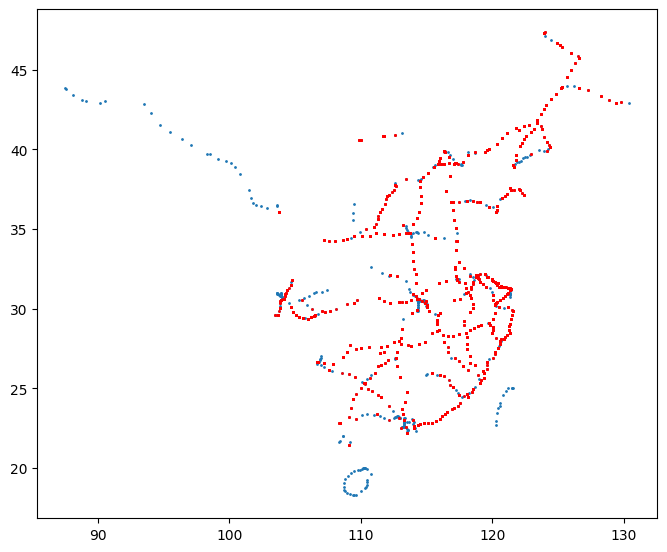

In [60]:
fig, ax = plt.subplots(figsize=(8,8))
#lines.plot(ax=ax, markersize=0.01, alpha=0.4)
stations.plot(ax=ax, markersize=1)
gpd.GeoDataFrame(stations_w_riders[
    stations_w_riders["geometry"].notna()
]).plot(ax=ax, color="red", markersize=1)